# **Primera entrega proyecto Kaggle**

- Cargamos las librerias

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


- Descargamos la data directamente de Kanggle

In [8]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json'
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

/bin/bash: -c: line 1: unexpected EOF while looking for matching `''
/bin/bash: -c: line 2: syntax error: unexpected end of file
  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 678MB/s]


- Descomprimimos y inspeccionamos los datos

In [9]:
!unzip udea*.zip > /dev/null

In [10]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185250 test.csv
   692501  10666231 143732449 train.csv
  1286075  15528571 207634372 total


In [11]:
df_1 = pd.read_csv("train.csv")
df_1

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328




*   Se obtiene información acerca de la base de datos




In [12]:
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             669322 non-null  object 
 9   FAMI_TIENELAVADORA              652727 non-null  object 
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object 
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object 
 12  ESTU_PAGOMATRICU



*   Se crea un histograma entre el número de estudiantes y el rendimiento global



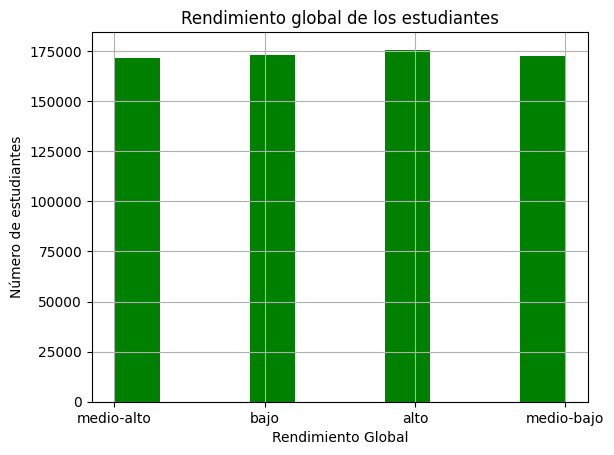

In [13]:
df_1['RENDIMIENTO_GLOBAL'].hist(color="green")
plt.xlabel("Rendimiento Global")
plt.ylabel("Número de estudiantes")
plt.title("Rendimiento global de los estudiantes")
plt.show()

- Creamos un subconjunto con las variables a graficar

In [14]:
z = df_1[['ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'FAMI_ESTRATOVIVIENDA' , 'ESTU_HORASSEMANATRABAJA',]]
z

,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_ESTRATOVIVIENDA,ESTU_HORASSEMANATRABAJA
0,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Estrato 3,Menos de 10 horas
1,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Estrato 3,0
2,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Estrato 3,Más de 30 horas
3,SANTANDER,Entre 4 millones y menos de 5.5 millones,Estrato 4,0
4,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Estrato 3,Entre 21 y 30 horas
...,...,...,...,...
692495,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Estrato 2,Entre 11 y 20 horas
692496,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Estrato 3,Más de 30 horas
692497,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Estrato 3,Menos de 10 horas
692498,TOLIMA,Entre 2.5 millones y menos de 4 millones,Estrato 1,Menos de 10 horas


**Gráfica de la cantidad de estudiantes por departamento**

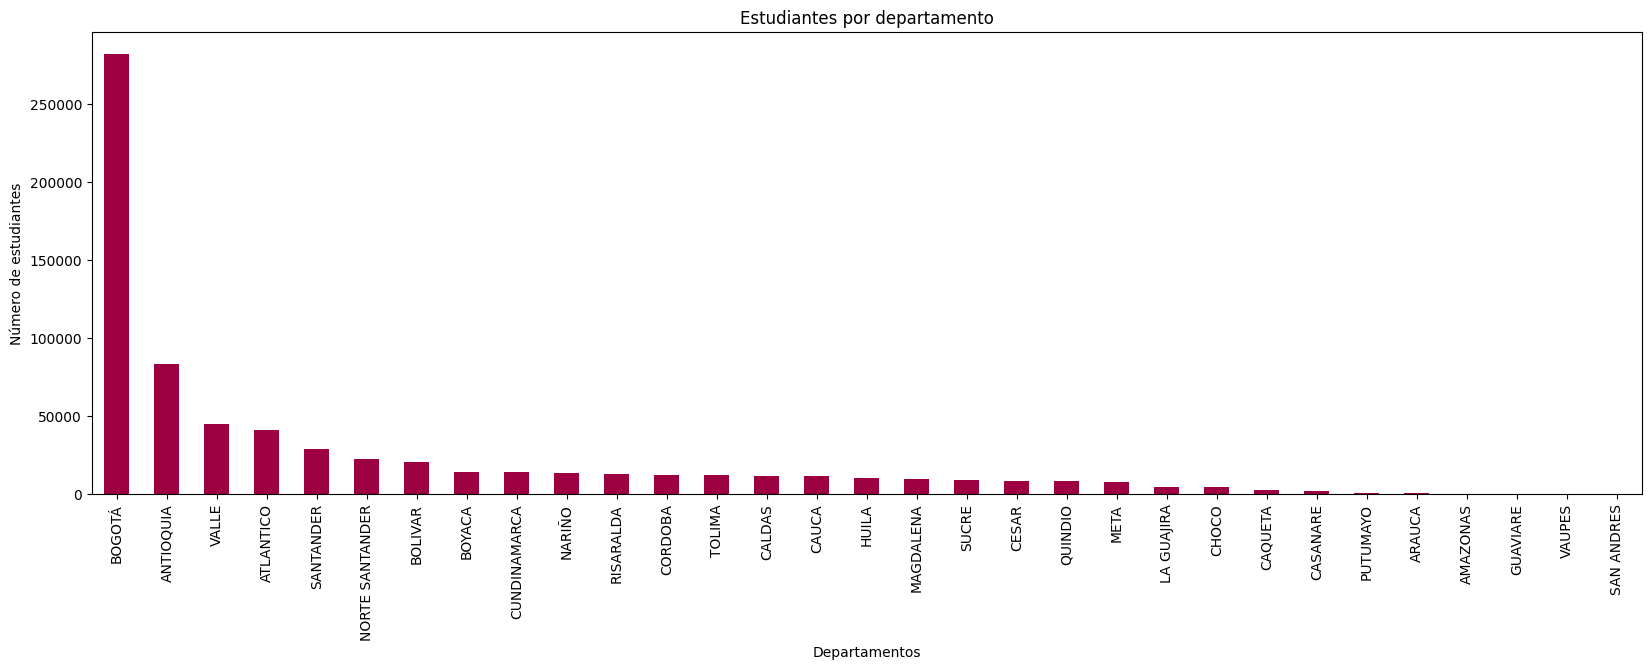

In [15]:
z1= z.ESTU_PRGM_DEPARTAMENTO.value_counts()

z1.plot(kind='bar', stacked=True, figsize=(20,6), colormap='Spectral')
plt.xlabel("Departamentos")
plt.ylabel("Número de estudiantes")
plt.title("Estudiantes por departamento")
plt.show()

**Gráfica del valor de la matricula que pagan los estudiantes**

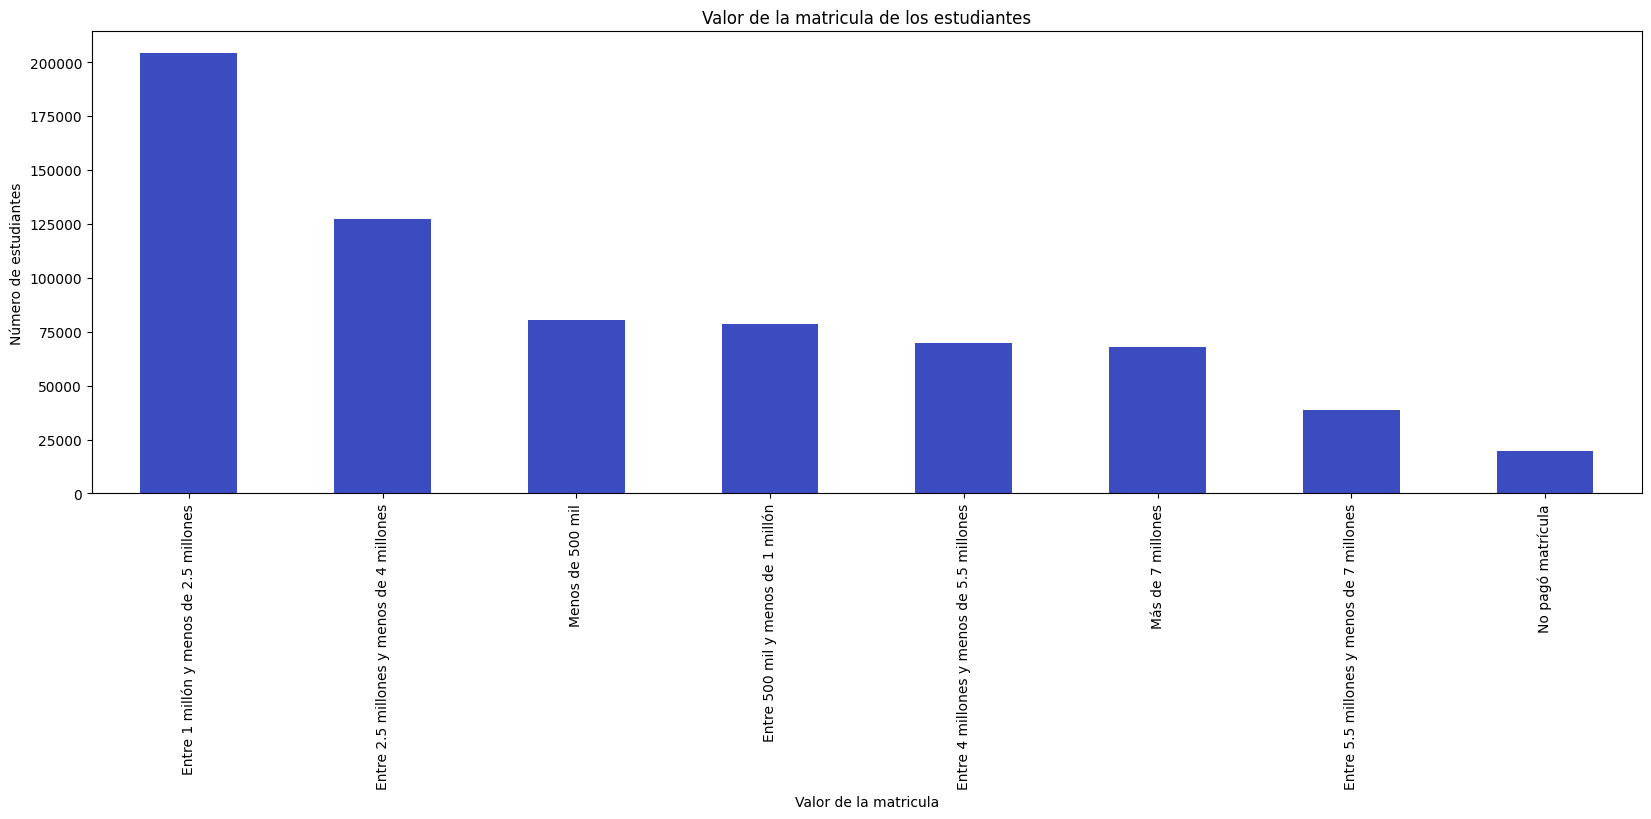

In [16]:
z2= z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

z2.plot(kind='bar', stacked=True, figsize=(20,6), colormap='coolwarm')
plt.xlabel("Valor de la matricula")
plt.ylabel("Número de estudiantes")
plt.title("Valor de la matricula de los estudiantes")
plt.show()

**Gráfica del estrato al que pertenecen los estudiantes**

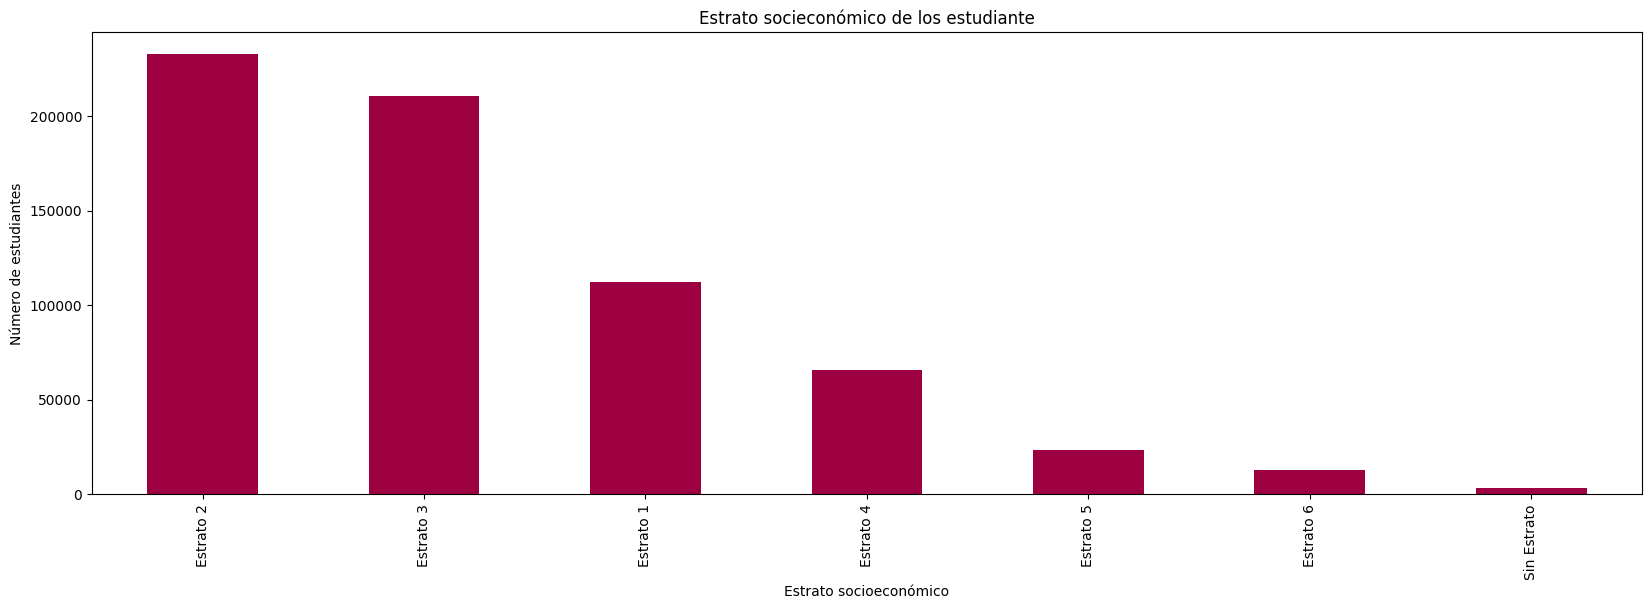

In [17]:
z3= z.FAMI_ESTRATOVIVIENDA.value_counts()

z3.plot(kind='bar', stacked=True, figsize=(20,6), colormap='Spectral')
plt.xlabel("Estrato socioeconómico")
plt.ylabel("Número de estudiantes")
plt.title("Estrato socieconómico de los estudiante")
plt.show()

**Gráfica de la cantidad de horas semanales que trabajan los estudiantes**

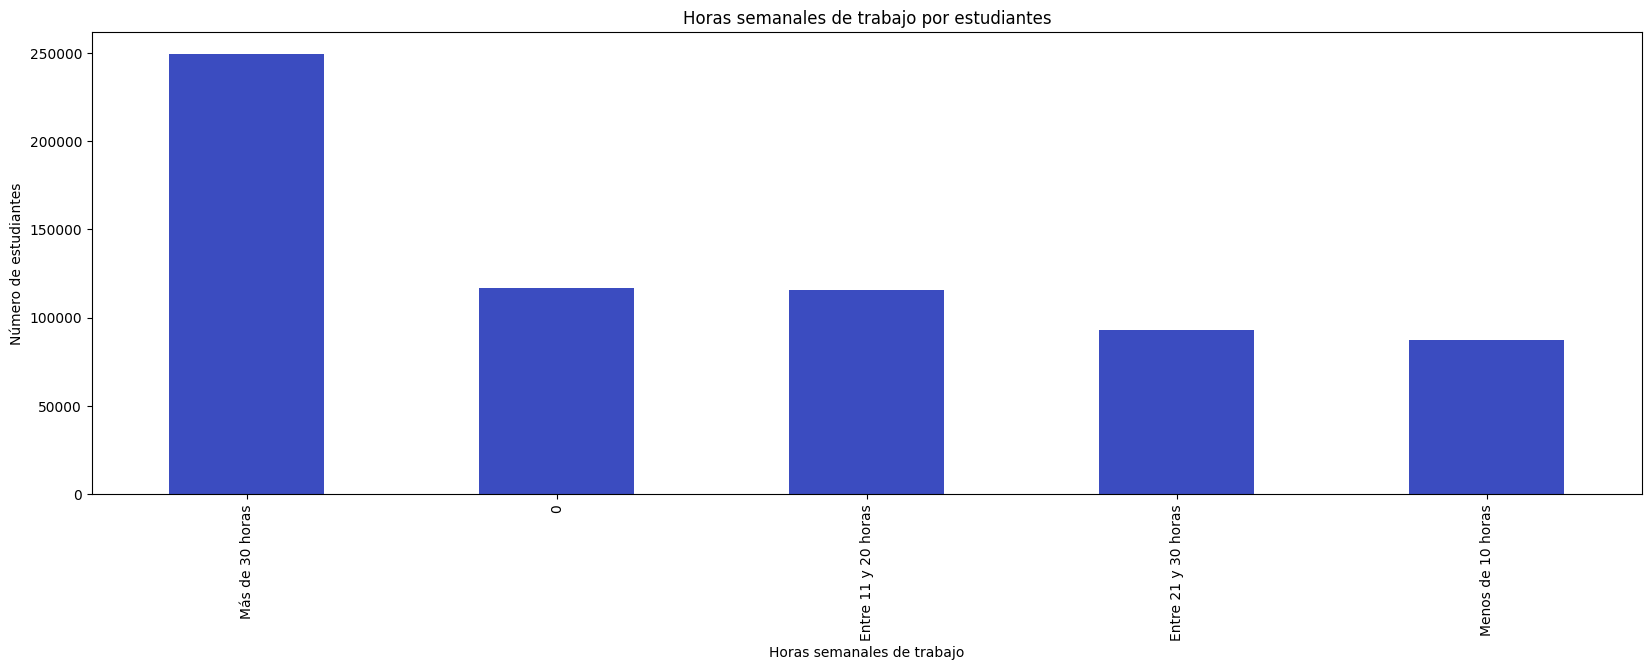

In [18]:
z4= z.ESTU_HORASSEMANATRABAJA.value_counts()

z4.plot(kind='bar', stacked=True, figsize=(20,6), colormap='coolwarm')
plt.xlabel("Horas semanales de trabajo")
plt.ylabel("Número de estudiantes")
plt.title("Horas semanales de trabajo por estudiantes")
plt.show()

# **Segunda entrega proyecto Kaggle**

In [19]:
#Conocer la cantidad de datos
df_1.shape

(692500, 21)

In [20]:
#Información acerca de la base de datos
#print(df_1.info())
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             669322 non-null  object 
 9   FAMI_TIENELAVADORA              652727 non-null  object 
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object 
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object 
 12  ESTU_PAGOMATRICU

In [21]:
#Contar los valores nulos de cada columna
df_1.isnull().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_TIENELAVADORA,39773


 **Identificar Varibles Categoricas**

In [22]:
cat_cols = df_1.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_cols)

['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL']


In [23]:
for col in cat_cols:
    print(f"{col}: {df_1[col].nunique()} categorías")

ESTU_PRGM_ACADEMICO: 948 categorías
ESTU_PRGM_DEPARTAMENTO: 31 categorías
ESTU_VALORMATRICULAUNIVERSIDAD: 8 categorías
ESTU_HORASSEMANATRABAJA: 5 categorías
FAMI_ESTRATOVIVIENDA: 7 categorías
FAMI_TIENEINTERNET: 2 categorías
FAMI_EDUCACIONPADRE: 12 categorías
FAMI_TIENELAVADORA: 2 categorías
FAMI_TIENEAUTOMOVIL: 2 categorías
ESTU_PRIVADO_LIBERTAD: 2 categorías
ESTU_PAGOMATRICULAPROPIO: 2 categorías
FAMI_TIENECOMPUTADOR: 2 categorías
FAMI_TIENEINTERNET.1: 2 categorías
FAMI_EDUCACIONMADRE: 12 categorías
RENDIMIENTO_GLOBAL: 4 categorías


In [24]:
c="RENDIMIENTO_GLOBAL"
df_1[c].value_counts()

,count
RENDIMIENTO_GLOBAL,
alto,175619
bajo,172987
medio-bajo,172275
medio-alto,171619


**Graficas**

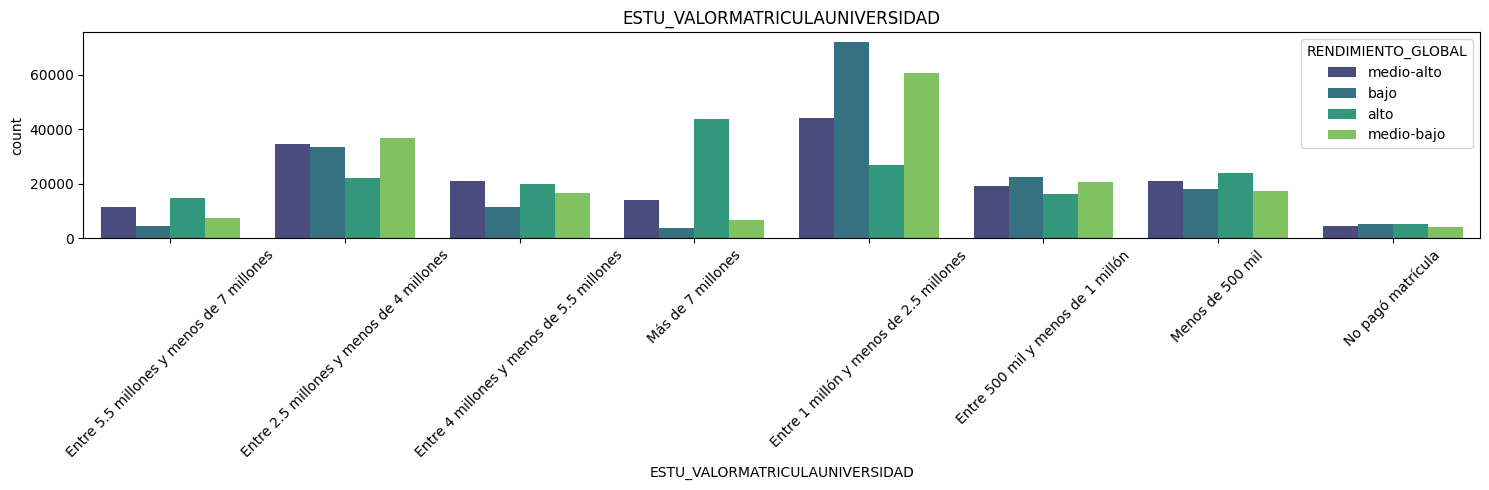

In [25]:
# Variables categóricas que se graficarán en relación con el rendimiento global
variables = ["ESTU_VALORMATRICULAUNIVERSIDAD"]

plt.figure(figsize=(15, 5))

# Itera sobre las variables y crea un gráfico para cada una con respecto al rendimiento global
for i, c in enumerate(variables):
    plt.subplot(1, len(variables), i + 1)
    sns.countplot(x=c, hue="RENDIMIENTO_GLOBAL", data=df_1, palette="viridis")
    plt.title(c)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

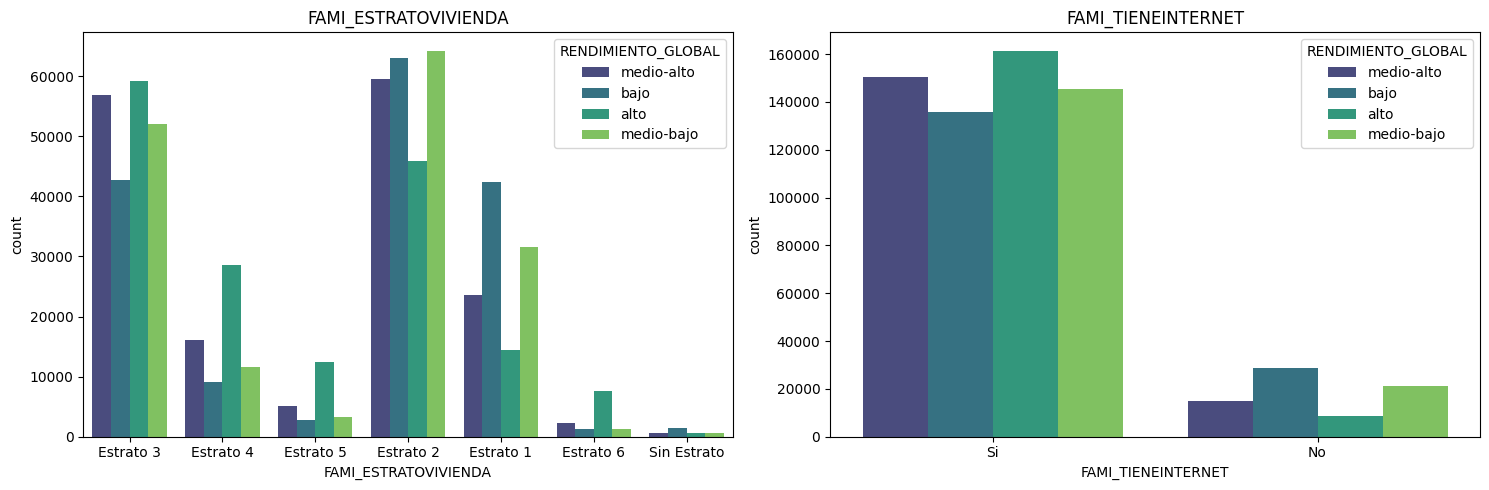

In [26]:
  # Variables categóricas que se graficarán en relación con el rendimiento global
variables = ["FAMI_ESTRATOVIVIENDA","FAMI_TIENEINTERNET"]

plt.figure(figsize=(15, 5))

# Itera sobre las variables y crea un gráfico para cada una con respecto al rendimiento global
for i, c in enumerate(variables):
    plt.subplot(1, len(variables), i + 1)
    sns.countplot(x=c, hue="RENDIMIENTO_GLOBAL", data=df_1, palette="viridis")
    plt.title(c)
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

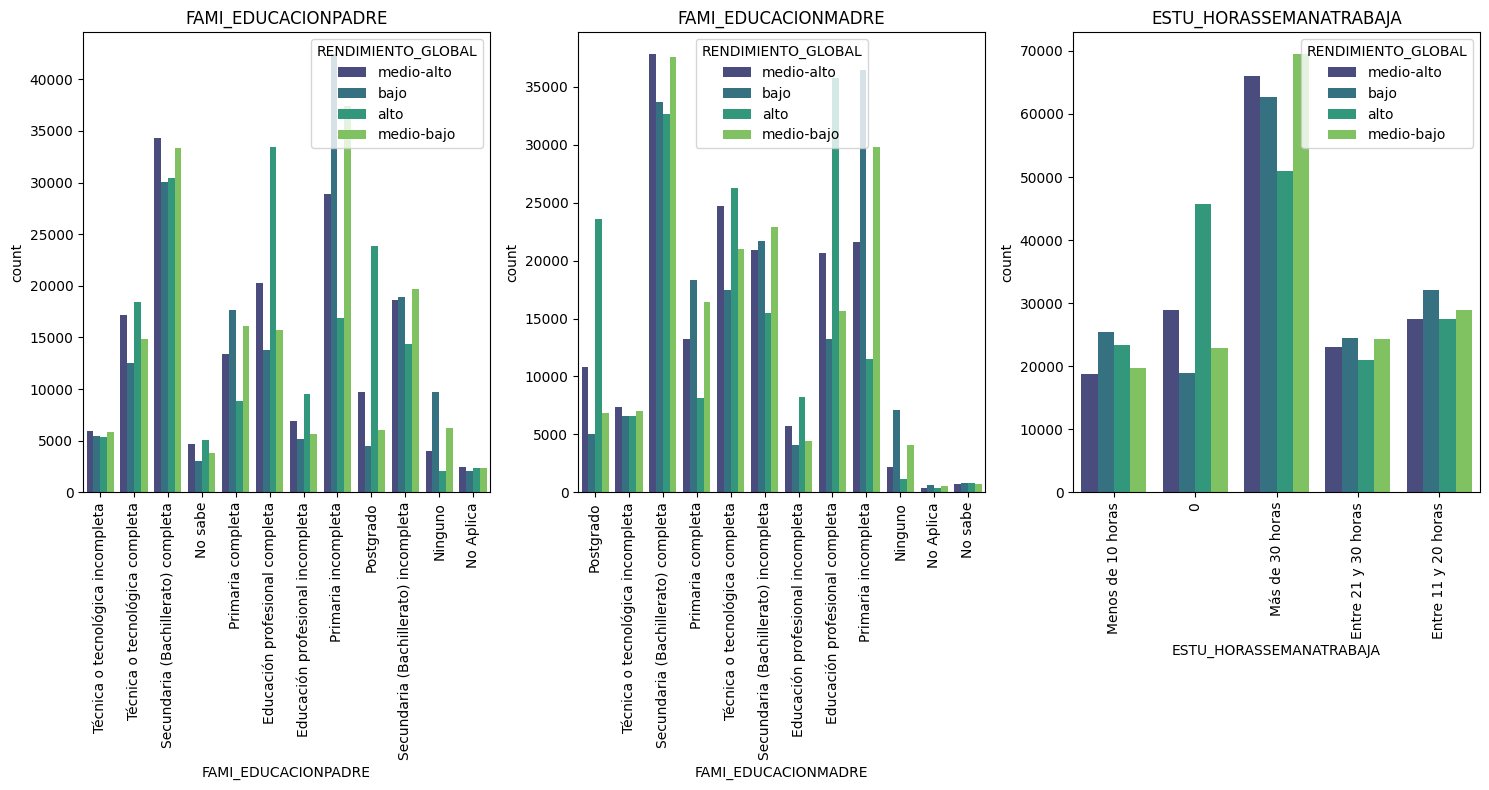

In [27]:
# Variables categóricas que se graficarán en relación con el rendimiento global
variables = ["FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE","ESTU_HORASSEMANATRABAJA"]

plt.figure(figsize=(15, 8))

# Itera sobre las variables y crea un gráfico para cada una con respecto al rendimiento global
for i, c in enumerate(variables):
    plt.subplot(1, len(variables), i + 1)
    sns.countplot(x=c, hue="RENDIMIENTO_GLOBAL", data=df_1, palette="viridis") #Paleta de colores "Set1", "Set2", "coolwarm", "pastel", "viridis", "husl"
    plt.title(c)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<ipython-input-28-7fed36821289>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df_1, palette="husl")


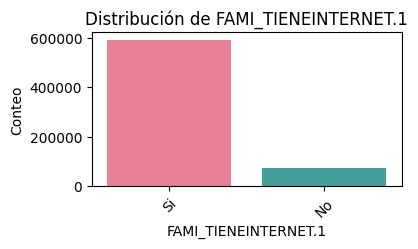

<ipython-input-28-7fed36821289>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df_1, palette="husl")


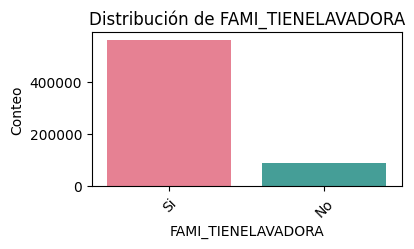

<ipython-input-28-7fed36821289>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df_1, palette="husl")


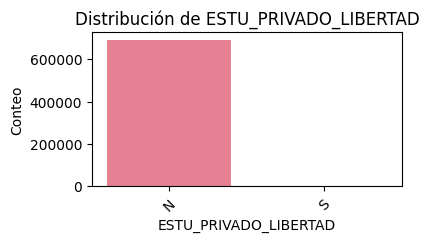

<ipython-input-28-7fed36821289>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df_1, palette="husl")


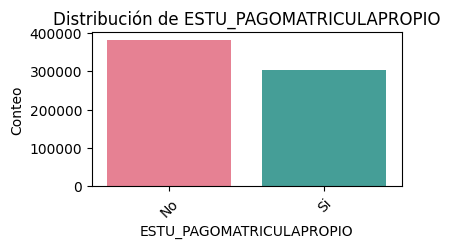

<ipython-input-28-7fed36821289>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df_1, palette="husl")


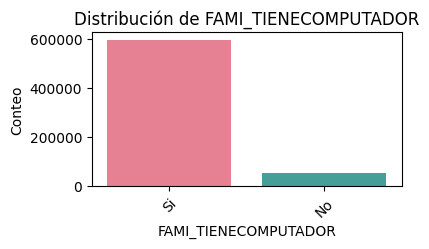

<ipython-input-28-7fed36821289>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df_1, palette="husl")


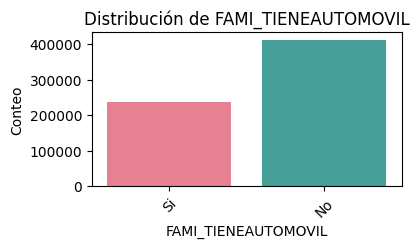

In [28]:
# Variables categóricas que se graficarán
variables = ["FAMI_TIENEINTERNET.1","FAMI_TIENELAVADORA", "ESTU_PRIVADO_LIBERTAD","ESTU_PAGOMATRICULAPROPIO", "FAMI_TIENECOMPUTADOR","FAMI_TIENEAUTOMOVIL"]

# Itera sobre las variables y crea un gráfico para cada una
for var in variables:
    plt.figure(figsize=(4, 2))
    sns.countplot(x=var, data=df_1, palette="husl")
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)
    plt.show()


**ANÁLISIS DE LAS GRÁFICAS CON VARIABLES CATEGORICAS**

Teniendo en cuenta la infomación anterior estudiando el dataFrame se llega a una conclusión.

La columna ESTU_PRIVADO_LIBERTAD no es necesaria ya que no aporta información útil al análisis, ya que no hay variabilidad.




In [29]:
df_1 = df_1.drop('ESTU_PRIVADO_LIBERTAD', axis=1)

Identificar si hay columnas repetidas

In [30]:
duplicadas = []
cols = df_1.columns

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if df_1[cols[i]].equals(df_1[cols[j]]):
            duplicadas.append(cols[j])

print("Columnas duplicadas:")
print(duplicadas)


Columnas duplicadas:
['FAMI_TIENEINTERNET.1']


Eliminar columnas repetidas

In [31]:
def eliminar_columnas_duplicadas(df_1):
    cols = df_1.columns
    columnas_a_eliminar = []
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            if df_1[cols[i]].equals(df_1[cols[j]]):
                columnas_a_eliminar.append(cols[j])
    return df_1.drop(columns=columnas_a_eliminar)

In [32]:
df_1 = eliminar_columnas_duplicadas(df_1)

In [33]:
#Verificar que ya no existan columnas duplicadas
duplicadas = []
cols = df_1.columns

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if df_1[cols[i]].equals(df_1[cols[j]]):
            duplicadas.append(cols[j])

Identificar Variables númericas

In [34]:
num_cols = df_1.select_dtypes(include=['number']).columns.tolist()
print("Columnas numéricas:")
print(num_cols)

Columnas numéricas:
['ID', 'PERIODO', 'coef_1', 'coef_2', 'coef_3', 'coef_4']



Completar los datos en columnas nulas

Si la columna es de texto o categoría, la rellena con el valor más frecuente.

Si es número, la rellena con el promedio



In [35]:
for col in df_1.columns:
    if df_1[col].isna().sum() > 0:
        if df_1[col].dtype == 'object':  # columnas categóricas
            df_1[col] = df_1[col].fillna(df_1[col].mode()[0])
        else:  # columnas numéricas
            df_1[col] = df_1[col].fillna(df_1[col].mean())


In [36]:
#Comprobar que ya no hay columnas nulas
df_1.isnull().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,0
ESTU_HORASSEMANATRABAJA,0
FAMI_ESTRATOVIVIENDA,0
FAMI_TIENEINTERNET,0
FAMI_EDUCACIONPADRE,0
FAMI_TIENELAVADORA,0


**Codificación de columnas**
Variables categoricas

In [37]:
#Hacer copia
df_2 = df_1.copy()

**Label Encoding**:

*   FAMI_ESTRATOVIVIENDA
*   FAMI_EDUCACIONPADRE
*   FAMI_EDUCACIONMADRE
* ESTU_VALORMATRICULAUNIVERSIDAD
* ESTU_HORASSEMANATRABAJA


*   **FAMI_ESTRATOVIVIENDA**


In [38]:
#Identificar valores úncios en la columna FAMI_ESTRATOVIVIENDA
df_2["FAMI_ESTRATOVIVIENDA"].value_counts(dropna=False)

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,264808
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


Para la columna **FAMI_ESTRATOVIVIENDA** se categorizara de la siguiente manera:
* Sin Estrato: **0**
* Estrato 1: **1**
* Estrato 2: **2**
* Estrato 3: **3**
* Estrato 4: **4**
* Estrato 5: **5**
* Estrato 6: **6**

In [39]:
#Aplicando el Label Encoding
df_2["FAMI_ESTRATOVIVIENDA"] = df_2["FAMI_ESTRATOVIVIENDA"].replace({
    "Sin Estrato": 0,
    "Estrato 1": 1,
    "Estrato 2": 2,
    "Estrato 3": 3,
    "Estrato 4": 4,
    "Estrato 5": 5,
    "Estrato 6": 6})

<ipython-input-39-5107d1614a1d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2["FAMI_ESTRATOVIVIENDA"] = df_2["FAMI_ESTRATOVIVIENDA"].replace({


In [40]:
#Verificar
df_2["FAMI_ESTRATOVIVIENDA"].value_counts()

,count
FAMI_ESTRATOVIVIENDA,
2,264808
3,210685
1,111991
4,65514
5,23608
6,12605
0,3289


* **FAMI_EDUCACIONPADRE**

In [41]:
#Identificar valores úncios en la columna FAMI_EDUCACIONPADRE
df_2["FAMI_EDUCACIONPADRE"].value_counts(dropna=False)

,count
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,151467
Primaria incompleta,125675
Educación profesional completa,83117
Secundaria (Bachillerato) incompleta,71654
Técnica o tecnológica completa,62995
Primaria completa,55958
Postgrado,44169
Educación profesional incompleta,27084
Técnica o tecnológica incompleta,22552


Para la columna **FAMI_EDUCACIONPADRE** se categorizara de la siguiente manera:
* No Aplica: **0**
* No sabe: **0**
* Primaria incompleta: **1**
* Primaria completa': **2**
* Secundaria (Bachillerato) incompleta: **3**
* Secundaria (Bachillerato) completa: **4**
* Técnica o tecnológica incompleta: **5**
* Técnica o tecnológica completa: **6**
* Educación profesional incompleta: **7**
* Educación profesional completa: **8**
* Postgrado: **9**

In [42]:
#Aplicando el Label Encoding
Edu_padre = {'No Aplica': 0,
             'No sabe': 0,
             'Primaria incompleta': 1,
             'Primaria completa': 2,
             'Secundaria (Bachillerato) incompleta': 3,
             'Secundaria (Bachillerato) completa': 4,
             'Técnica o tecnológica incompleta': 5,
             'Técnica o tecnológica completa': 6,
             'Educación profesional incompleta': 7,
             'Educación profesional completa': 8,
             'Postgrado': 9}

# Aplicar reemplazo
df_2["FAMI_EDUCACIONPADRE"] = df_2["FAMI_EDUCACIONPADRE"].replace(Edu_padre)

In [43]:
#Verificar
df_2["FAMI_EDUCACIONPADRE"].value_counts()

,count
FAMI_EDUCACIONPADRE,
4,151467
1,125675
8,83117
3,71654
6,62995
2,55958
9,44169
7,27084
0,25821


* **FAMI_EDUCACIONMADRE**

In [44]:
#Identificar valores úncios en la columna FAMI_EDUCACIONMADRE
df_2["FAMI_EDUCACIONMADRE"].value_counts(dropna=False)

,count
FAMI_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,165408
Primaria incompleta,99420
Técnica o tecnológica completa,89542
Educación profesional completa,85326
Secundaria (Bachillerato) incompleta,81012
Primaria completa,56125
Postgrado,46246
Técnica o tecnológica incompleta,27533
Educación profesional incompleta,22470


Para la columna **FAMI_EDUCACIONMADRE** se categorizara de la siguiente manera:



* No Aplica: **0**
* No sabe: **0**
* Primaria incompleta: **1**
* Primaria completa: **2**
* Secundaria (Bachillerato) incompleta: **3**
* Secundaria (Bachillerato) completa: **4**
* Técnica o tecnológica incompleta: **5**
* Técnica o tecnológica completa: **6**
* Educación profesional incompleta': **7**,
* Educación profesional completa: **8**
* Postgrado: **9**


In [45]:
# Diccionario de codificación
Edu_madre = {'No Aplica': 0,
             'No sabe': 0,
             'Ninguno': 0,
             'Primaria incompleta': 1,
             'Primaria completa': 2,
             'Secundaria (Bachillerato) incompleta': 3,
             'Secundaria (Bachillerato) completa': 4,
             'Técnica o tecnológica incompleta': 5,
             'Técnica o tecnológica completa': 6,
             'Educación profesional incompleta': 7,
             'Educación profesional completa': 8,
             'Postgrado': 9}

# Reemplazar valores
df_2["FAMI_EDUCACIONMADRE"] = df_2["FAMI_EDUCACIONMADRE"].replace(Edu_madre)


<ipython-input-45-492f25f444be>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2["FAMI_EDUCACIONMADRE"] = df_2["FAMI_EDUCACIONMADRE"].replace(Edu_madre)


In [46]:
#Verificar
df_2["FAMI_EDUCACIONMADRE"].value_counts()

,count
FAMI_EDUCACIONMADRE,
4,165408
1,99420
6,89542
8,85326
3,81012
2,56125
9,46246
5,27533
7,22470


**ESTU_VALORMATRICULAUNIVERSIDAD**

In [47]:
#Identificar valores úncios en la columna ESTU_VALORMATRICULAUNIVERSIDAD
df_2["ESTU_VALORMATRICULAUNIVERSIDAD"].value_counts(dropna=False)

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
Entre 1 millón y menos de 2.5 millones,210335
Entre 2.5 millones y menos de 4 millones,127430
Menos de 500 mil,80263
Entre 500 mil y menos de 1 millón,78704
Entre 4 millones y menos de 5.5 millones,69736
Más de 7 millones,68014
Entre 5.5 millones y menos de 7 millones,38490
No pagó matrícula,19528


Para la columna **ESTU_VALORMATRICULAUNIVERSIDAD** se categorizara de la siguiente manera:
* No pagó matrícula: **0**
* Menos de 500 mil: **1**
* Entre 500 mil y menos de 1 millón: **2**
* Entre 1 millón y menos de 2.5 millones: **3**
* Entre 2.5 millones y menos de 4 millones: **4**
* Entre 4 millones y menos de 5.5 millones: **5**
* Entre 5.5 millones y menos de 7 millones: **6**
* Más de 7 millones: **7**


In [48]:
# Diccionario de codificación ordenada
matricula_map = {'No pagó matrícula': 0,
                 'Menos de 500 mil': 1,
                 'Entre 500 mil y menos de 1 millón': 2,
                 'Entre 1 millón y menos de 2.5 millones': 3,
                 'Entre 2.5 millones y menos de 4 millones': 4,'Entre 4 millones y menos de 5.5 millones': 5,
                 'Entre 5.5 millones y menos de 7 millones': 6,
                 'Más de 7 millones': 7}

# Reemplazar en el DataFrame
df_2["ESTU_VALORMATRICULAUNIVERSIDAD"] = df_2["ESTU_VALORMATRICULAUNIVERSIDAD"].replace(matricula_map)

<ipython-input-48-039404ae3b5f>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2["ESTU_VALORMATRICULAUNIVERSIDAD"] = df_2["ESTU_VALORMATRICULAUNIVERSIDAD"].replace(matricula_map)


In [49]:
#Verificar
df_2["ESTU_VALORMATRICULAUNIVERSIDAD"].value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
3,210335
4,127430
1,80263
2,78704
5,69736
7,68014
6,38490
0,19528


**ESTU_HORASSEMANATRABAJA**

In [50]:
#Identificar valores úncios en la columna ESTU_HORASSEMANATRABAJA
df_2["ESTU_HORASSEMANATRABAJA"].value_counts(dropna=False)

,count
ESTU_HORASSEMANATRABAJA,
Más de 30 horas,280209
0,116550
Entre 11 y 20 horas,115857
Entre 21 y 30 horas,92693
Menos de 10 horas,87191


Para la columna **ESTU_HORASSEMANATRABAJA** se categorizara de la siguiente manera:

* 0: **0**
* Menos de 10 horas: **1**
* Entre 11 y 20 horas: **2**
* Entre 21 y 30 horas: **3**
* Más de 30 horas: **4**

In [51]:
# Diccionario de codificación
horas_map = {'0': 0,'Menos de 10 horas': 1,
             'Entre 11 y 20 horas': 2,
             'Entre 21 y 30 horas': 3,
             'Más de 30 horas': 4}

# Reemplazar en el DataFrame
df_2["ESTU_HORASSEMANATRABAJA"] = df_2["ESTU_HORASSEMANATRABAJA"].replace(horas_map)

<ipython-input-51-6f129c683b61>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2["ESTU_HORASSEMANATRABAJA"] = df_2["ESTU_HORASSEMANATRABAJA"].replace(horas_map)


In [52]:
#Verificar
df_2["ESTU_HORASSEMANATRABAJA"].value_counts()

,count
ESTU_HORASSEMANATRABAJA,
4,280209
0,116550
2,115857
3,92693
1,87191


***One-Hot Encoding***

Para columnas como:

* ESTU_PRGM_ACADEMICO

* ESTU_PRGM_DEPARTAMENTO

**ESTU_PRGM_ACADEMICO**

In [53]:
# Reemplazar la parte "PROFESIONAL EN" con una cadena vacía
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].str.replace('PROFESIONAL EN ', '')

Para la columna **ESTU_PRGM_ACADEMICO** se decide hacer agrupación por los programas que tengan alguna relación

Ejemplo:

Para todas las INGENIERIAS se decide reemplazar por la palabra INGENIERIA

Para todas las LICENCIATURAS se decide reemplazar por la palabra LICENCIATURA

In [54]:
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'INGENIERIA' if x.startswith('INGE') else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'LICENCIATURA' if x.startswith('LIC') or x.startswith('Lic') else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'ADMINISTRACION' if x.startswith('ADM') else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CONTADURIA' if x.startswith('CONT') else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'COMUNICACION' if x.startswith('COMU') else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'DEPORTE' if 'DEPORT' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'PSICOLOGIA' if 'PSIC' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'TRABAJO SOCIAL' if 'TRABAJO SOCIAL' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'DISEÑO' if 'DISE' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'TERAPIA' if 'TERAP' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'GASTRONOMIA' if 'GASTRON' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'VETERINARIA Y ZOOTECNIA' if 'ZOOTECNIA' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'NUTRICION' if 'NUTRIC' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'MARKETING' if ('MARKETING' in x or 'PUBLICIDAD' in x or 'MERCAD' in x) else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'MATEMATICAS Y ESTADISTICA' if ('MATE' in x or 'ESTA' in x) else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'ARTES' if 'ARTE' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'LITERATURA' if 'LITER' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'MUSICA' if ('MUS' in x or 'MÚS' in x) else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'ECONOMIA Y NEGOCIOS' if ('ECONO' in x or 'NEG' in x or 'COME' in x or 'FIN' in x) else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS DE LA TIERRA' if 'GEO' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS AUDIOVISUALES' if ('CINE' in x or 'RADIO' in x or 'TELEV' in x or 'AUDIOV' in x or 'FOTOG' in x) else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'DERECHO' if 'DERECHO' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS POLITICAS' if ('POLIT' in x or 'POLÍT' in x) else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'INGENIERIA' if 'INGE' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'QUIMICA' if ('QUIM' in x or 'QUÍM' in x or 'QU¿M' in x) else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CONSTRUCCION' if 'CONST' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'TURISMO' if 'TURIS' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'BIBLIOTECOLOGIA' if 'BIBLIO' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'FILOSOFIA' if 'FILOS' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'FILOLOGIA' if 'FILOL' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'ODONTOLOGIA' if 'ODONTOLOG' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'BIOLOGIA Y MICROBIOLOGIA' if 'BIOL' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'ECOLOGIA' if x.startswith('ECOL') else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'BACTERIOLOGIA' if 'BACT' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].replace('ACUICULTURA', 'ACUICULTURA')
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS CULTURALES' if 'CULT' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'INSTRUMENTACION QUIRURGICA' if 'INSTRUMENTACION' in x else x)
df_2['ESTU_PRGM_ACADEMICO'] = df_2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS MARITIMAS Y AERONAUTICAS' if ('MILIT' in x or 'NAVALES' in x or 'NAU' in x) else x)


In [55]:
c = "ESTU_PRGM_ACADEMICO"
df_2[c].nunique()

110

In [56]:
# Calcula el conteo de cada valor en la columna 'ESTU_PRGM_ACADEMICO'
conteo_valores = df_2['ESTU_PRGM_ACADEMICO'].value_counts()

# Obtén los valores que tienen menos de N registros
valores_menos_de_20 = conteo_valores[conteo_valores <= 20]
valores_menos_de_20

# Reemplaza los valores que tienen menos de N registros con 'OTRO PROGRAMA'
for valor in valores_menos_de_20.index:
    df_2.loc[df_2['ESTU_PRGM_ACADEMICO'] == valor, 'ESTU_PRGM_ACADEMICO'] = 'OTRO PROGRAMA'

In [57]:
df_2["ESTU_PRGM_ACADEMICO"].nunique()

95

In [58]:
df_2 = pd.get_dummies(df_2, columns=['ESTU_PRGM_ACADEMICO'], drop_first=True)

**ESTU_PRGM_DEPARTAMENTO**

In [59]:
df_2 = pd.get_dummies(df_2, columns=['ESTU_PRGM_DEPARTAMENTO'], drop_first=True)

**Columnas binarias**
* Si: **1**
* No: **0**

In [60]:
cols_binarias = ['FAMI_TIENEINTERNET','FAMI_TIENELAVADORA','FAMI_TIENEAUTOMOVIL','ESTU_PAGOMATRICULAPROPIO','FAMI_TIENECOMPUTADOR']

for col in cols_binarias:
    df_2[col] = df_2[col].replace({'Si': 1,
                                   'No': 0})

<ipython-input-60-440e28d99233>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2[col] = df_2[col].replace({'Si': 1,


In [61]:
#Verificar
df_2["FAMI_TIENEINTERNET" ].value_counts()

,count
FAMI_TIENEINTERNET,
1,619143
0,73357


In [62]:
df_2["FAMI_TIENELAVADORA" ].value_counts()

,count
FAMI_TIENELAVADORA,
1,603163
0,89337


In [63]:
df_2["FAMI_TIENEAUTOMOVIL" ].value_counts()

,count
FAMI_TIENEAUTOMOVIL,
0,456229
1,236271


In [64]:
df_2["ESTU_PAGOMATRICULAPROPIO" ].value_counts()

,count
ESTU_PAGOMATRICULAPROPIO,
0,388699
1,303801


In [65]:
df_2["FAMI_TIENECOMPUTADOR" ].value_counts()

,count
FAMI_TIENECOMPUTADOR,
1,635773
0,56727


**Normalizar columnas**

In [66]:
#Verificamos la cantidad de columnas que hay, su columna inicial y final
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Columns: 141 entries, ID to ESTU_PRGM_DEPARTAMENTO_VAUPES
dtypes: bool(124), float64(4), int64(11), object(2)
memory usage: 171.7+ MB


In [67]:
from sklearn.preprocessing import MinMaxScaler

# Lista de columnas a normalizar
columnas_a_normalizar = ['coef_1', 'coef_2', 'coef_3', 'coef_4']

# Crear el normalizador
scaler = MinMaxScaler()

# Aplicar transformación
df_2[columnas_a_normalizar] = scaler.fit_transform(df_2[columnas_a_normalizar])


In [68]:
#Verificar
df_2[columnas_a_normalizar].describe()

,coef_1,coef_2,coef_3,coef_4
count,692500.000000,692500.000000,692500.000000,692500.000000
mean,0.408872,0.533872,0.819023,0.791877
std,0.185890,0.191951,0.183945,0.204650
min,0.000000,0.000000,0.000000,0.000000
25%,0.308980,0.435318,0.793750,0.768072
50%,0.365297,0.556468,0.862500,0.858434
75%,0.477930,0.634497,0.915625,0.912651
max,1.000000,1.000000,1.000000,1.000000
